### 1. Read fetch_20newsgroups from sklearn.datasets. 


In [1]:
from sklearn.datasets import fetch_20newsgroups

# Fetch the dataset
newsgroups = fetch_20newsgroups(subset="all")
documents = newsgroups.data[:20]
documents

["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which h

### 2. Perform necessary preprocessing steps for text data such as 
#### a. Tokenization 
#### b. Removing all punctuation and lowercase words. 
#### c. Removing the stop words. 
#### d. Stemming 

In [2]:
import nltk

nltk.download("stopwords")
nltk.download("punkt_tabl")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brobean/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punkt_tabl: Package 'punkt_tabl' not found
[nltk_data]     in index


False

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Define stop words and stemmer
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()


# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercase and remove punctuation
    tokens = [word.lower() for word in tokens if word.isalpha()]
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens


# 预处理所有文档
processed_documents = [preprocess_text(doc) for doc in documents]

processed_documents

[['mamatha',
  'devineni',
  'ratnam',
  'subject',
  'pen',
  'fan',
  'reaction',
  'organ',
  'post',
  'offic',
  'carnegi',
  'mellon',
  'pittsburgh',
  'pa',
  'line',
  'sure',
  'basher',
  'pen',
  'fan',
  'pretti',
  'confus',
  'lack',
  'kind',
  'post',
  'recent',
  'pen',
  'massacr',
  'devil',
  'actual',
  'bit',
  'puzzl',
  'bit',
  'reliev',
  'howev',
  'go',
  'put',
  'end',
  'relief',
  'bit',
  'prais',
  'pen',
  'man',
  'kill',
  'devil',
  'wors',
  'thought',
  'jagr',
  'show',
  'much',
  'better',
  'regular',
  'season',
  'stat',
  'also',
  'lot',
  'fo',
  'fun',
  'watch',
  'playoff',
  'bowman',
  'let',
  'jagr',
  'lot',
  'fun',
  'next',
  'coupl',
  'game',
  'sinc',
  'pen',
  'go',
  'beat',
  'pulp',
  'jersey',
  'anyway',
  'disappoint',
  'see',
  'island',
  'lose',
  'final',
  'regular',
  'season',
  'game',
  'pen',
  'rule'],
 ['mblawson',
  'matthew',
  'b',
  'lawson',
  'subject',
  'vlb',
  'video',
  'card',
  'summari',

### 3. Create bag of words. 

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the bag of words model
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([' '.join(doc) for doc in processed_documents])

# Convert the bag of words model to a DataFrame for better readability
bow_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,abandon,abc,abil,abl,accept,access,accid,accur,accus,acid,...,write,wrong,wrote,wynn,yarker,yeah,year,yesterday,yet,york
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,1,1,0,0,0,2,0,1,1
3,0,0,1,0,0,1,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### 4. Apply one type of the Topic Modeling methods (LDA or LSA) to find the news topics. 

In [5]:
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import gensim

# Try different numbers of topics
best_coherence = 0
best_n_topics = 0
best_lda_model = None

for n_topics in range(2, 21):
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)

    # Convert to gensim format
    dictionary = Dictionary(processed_documents)
    corpus = [dictionary.doc2bow(text) for text in processed_documents]
    gensim_lda = gensim.models.ldamodel.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=n_topics,
        random_state=42,
        passes=10,
    )

    # Calculate coherence score
    coherence_model_lda = CoherenceModel(
        model=gensim_lda,
        texts=processed_documents,
        dictionary=dictionary,
        coherence="c_v",
    )
    coherence_lda = coherence_model_lda.get_coherence()

    print(f"number of topic: {n_topics}, coherence: {coherence_lda}")

    if coherence_lda > best_coherence:
        best_coherence = coherence_lda
        best_n_topics = n_topics
        best_lda_model = lda


print(f"best number of topics: {best_n_topics}, coherence: {best_coherence}")

number of topic: 2, coherence: 0.3726142325876844
number of topic: 3, coherence: 0.36267488994423847
number of topic: 4, coherence: 0.3518563641407494
number of topic: 5, coherence: 0.49726338335379855
number of topic: 6, coherence: 0.5200630416737898
number of topic: 7, coherence: 0.34593360489884084
number of topic: 8, coherence: 0.4039358393896011
number of topic: 9, coherence: 0.3838362128458787
number of topic: 10, coherence: 0.49744534910431115
number of topic: 11, coherence: 0.5329169238456045
number of topic: 12, coherence: 0.4828150444802775
number of topic: 13, coherence: 0.49889617122204327
number of topic: 14, coherence: 0.5480702535734633
number of topic: 15, coherence: 0.5594681487685065
number of topic: 16, coherence: 0.5148052712018882
number of topic: 17, coherence: 0.5732251288494832
number of topic: 18, coherence: 0.5616108280837042
number of topic: 19, coherence: 0.5463004781006091
number of topic: 20, coherence: 0.4962065176491396
best number of topics: 17, coheren

### 5. AZer finding the “Topics” use word clouds and coherence metrics to modify and get a meaningful set of topics.

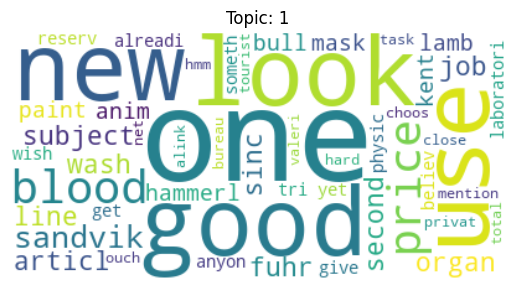

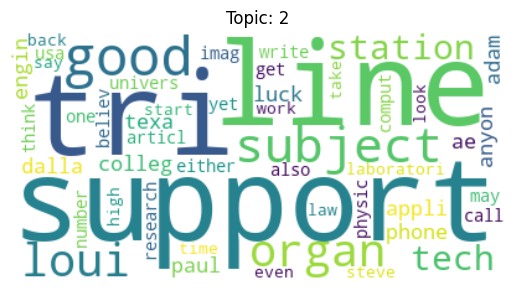

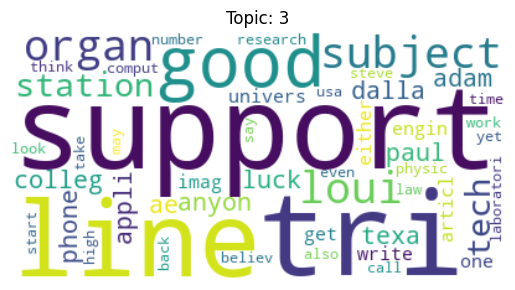

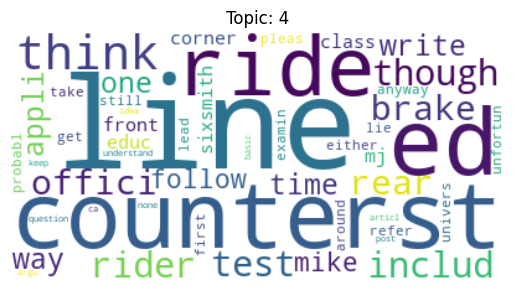

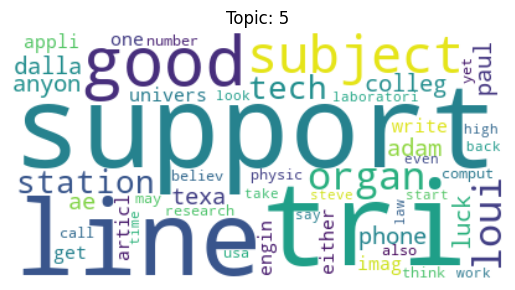

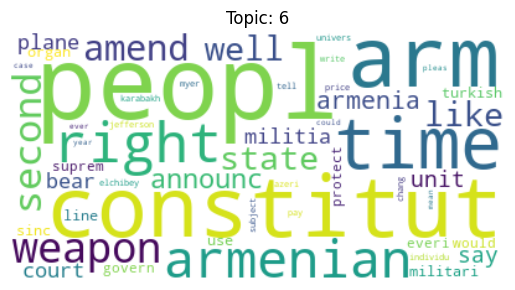

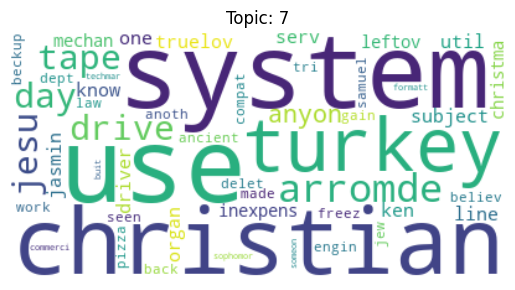

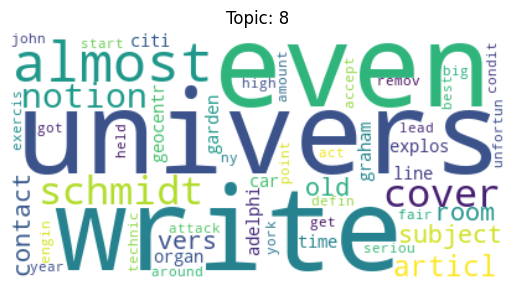

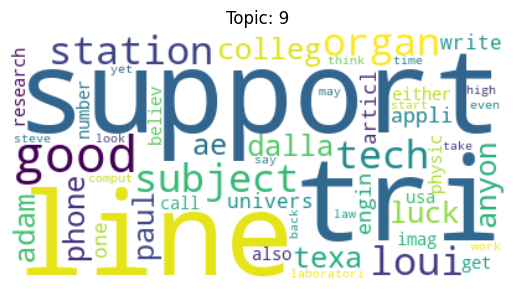

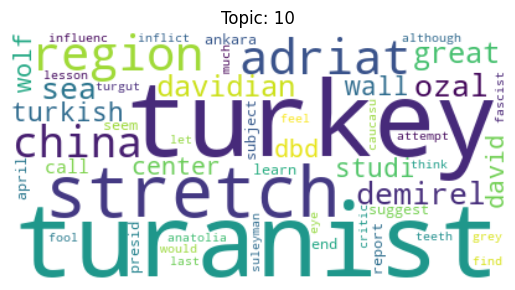

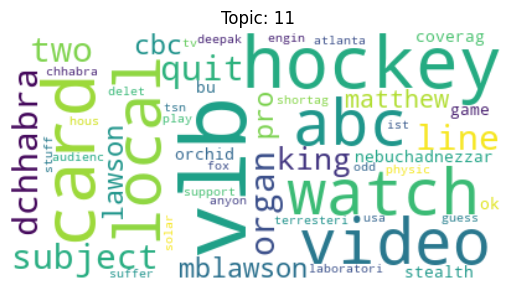

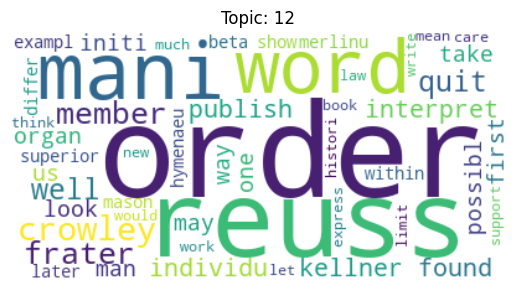

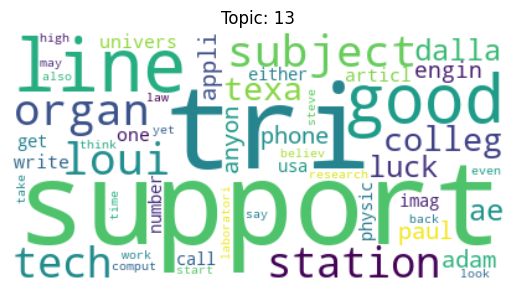

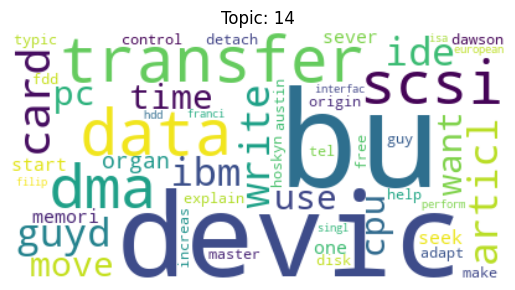

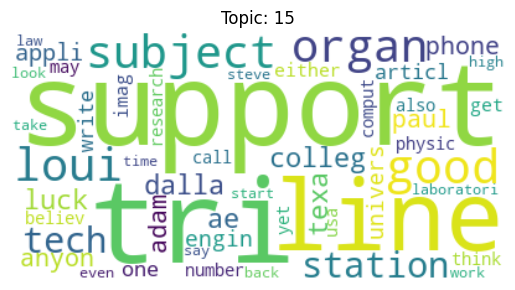

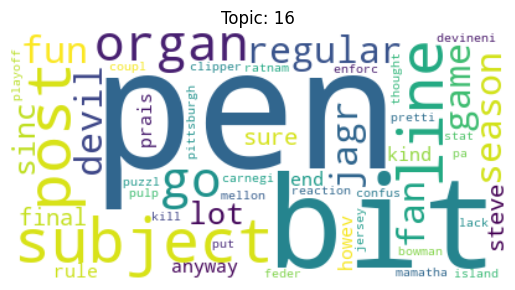

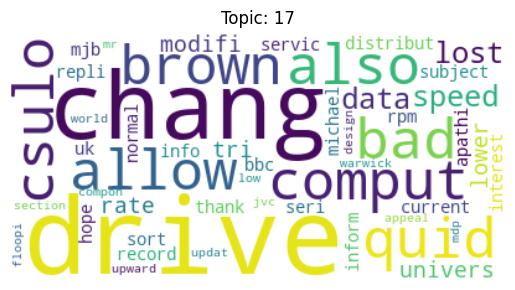

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Plot word clouds for each topic
def plot_word_cloud(lda_model, n_topics, vectorizer):
    for idx, topic in enumerate(lda_model.components_):
        plt.figure()
        wordcloud = WordCloud(background_color="white", max_words=50).fit_words(
            {
                vectorizer.get_feature_names_out()[i]: topic[i]
                for i in topic.argsort()[:-51:-1]
            }
        )
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Topic: {idx + 1}")
        plt.show()


plot_word_cloud(best_lda_model, best_n_topics, vectorizer)